best_vals: [7676.33559894  259.90499966   10.41338378]
covar: [[ 2.11468814e+03  1.64261179e-03 -2.09667407e+00]
 [ 1.64261179e-03  1.18623439e-04 -4.41412604e-06]
 [-2.09667407e+00 -4.41412604e-06  5.69004080e-03]]


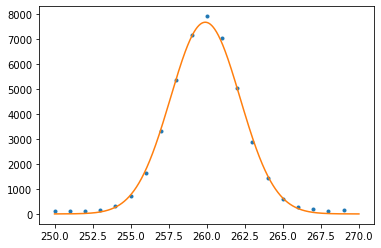

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

file = np.loadtxt('EC_24keV.txt')
channel = list(range(0,len(file)))
x = np.linspace(250,270,1000)


def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

init_vals = [8000, 250, 1]  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, channel[250:270], file[250:270], p0=init_vals, sigma=np.sqrt(file[250:270]), absolute_sigma=True)
print('best_vals: {}'.format(best_vals))
print('covar: {}'.format(covar))

fit = best_vals[0]*np.exp(-(x-best_vals[1])**2 / best_vals[2])


plt.clf
plt.plot(channel[250:270],file[250:270],'.')
plt.plot(x,fit)
